Diff: 2.298
Diff: 2.276
Diff: 3.031
Diff: 2.854
Diff: 1.577
Diff: 3.724
Diff: 4.118
Diff: 3.076
Diff: 2.615
Diff: 3.377
Diff: 3.598
Diff: 2.742
Diff: 4.82
Diff: 8.675
Diff: 3.123
Diff: 49.354
Diff: 5.998
Diff: 5.853
Diff: 1.721
Diff: 3.598
Diff: 2.344
Diff: 3.021
Diff: 2.821
Diff: 5.403
Diff: 2.747
Diff: 1.777
Diff: 2.665
Diff: 3.504
Diff: 2.077
Diff: 4.121
Diff: 1.044
Diff: 2.876
Diff: 6.221


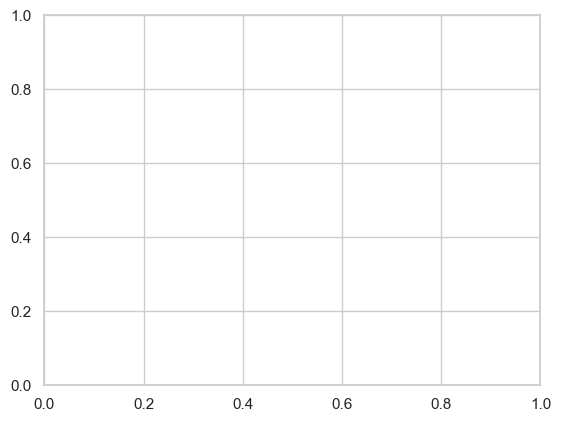

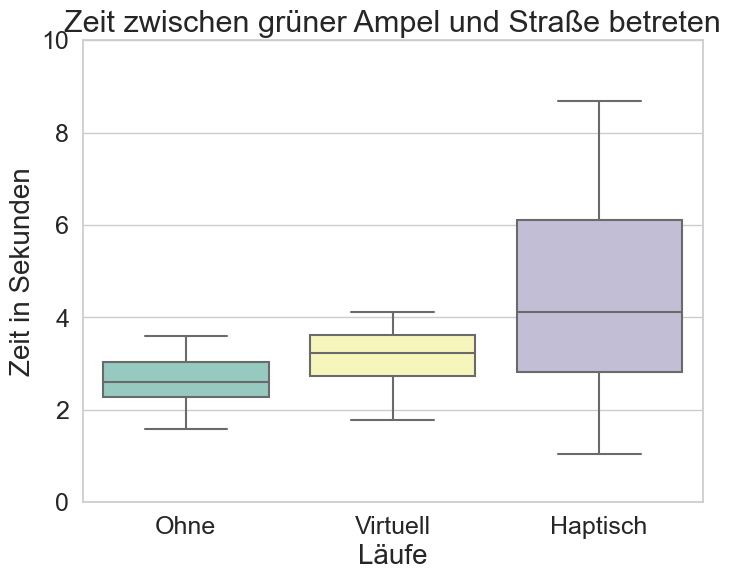

In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import os

fontsizeHeader = 22
fontsizeLabel = 20
fontsize = 18

def visualizeTime(data, nr, name, fliers):
    sns.set(style="whitegrid")
    plt.figure(figsize=(8, 6))  # Größe des Plots festlegen
    ax = sns.boxplot(data=data, palette="Set3", showfliers=fliers)  # "Set3" ist ein Farbschema
    ax.set_ylim(0,10)
    plt.yticks(fontsize=fontsize)
    plt.xticks([0, 1, 2], ['Ohne', 'Virtuell', 'Haptisch'], fontsize=fontsize)  # Beschriftungen für die Boxplots
    plt.xlabel("Läufe", fontsize=fontsizeLabel)
    plt.ylabel("Zeit in Sekunden", fontsize=fontsizeLabel)
    plt.title('Zeit zwischen grüner Ampel '+ str(nr) + 'und Straße betreten', fontsize=fontsizeHeader)
    plt.savefig('../Visualisierungen/reaktionszeit_' + name + '__' + str(nr) + '.png', dpi=300)
    plt.show()

def analyseTimeToStartMovement2(df, lsa):
    color_heights = {'Green': 10, 'Yellow': 5,'RedYellow': 15, 'Red': 0}
    df[lsa] = df[lsa].map(color_heights)
    
    first_zero_index = (df[lsa] == 0).idxmax()
    row_with_first_zero = df.loc[first_zero_index]
    
    starttime = row_with_first_zero['TimeStamp_Unix'] * 1000 + row_with_first_zero['TimeStamp_MS']
    endtime = df['TimeStamp_Unix'].max() * 1000 + df['TimeStamp_MS'].tail(1).values[0]

    diff = (endtime - starttime) / 1000.
    print('Diff: ' + str(diff))

    #sns.lineplot(data=df[['TS_VRActor_MoveComp_MaxWalkSpeed',lsa]])
    #plt.show()
    return diff

    
def analyseTimeToStartMovement(ids, begin, end, lsa):
    times = []
    for n in ids:
        #print('person nr. ' + str(n))
        filepath = '../Versuchsdaten_vorverarbeitet/' + str(n) + '/dynamicrun.csv'
        
        if not os.path.isfile(filepath):
            print('No data to read nr. ' + str(n))
            continue
        df = pd.read_csv(filepath, sep=';')
        
        start1_df = df.groupby([begin, end])
        for group_value, group_data in start1_df:
            if group_value == (True, False): #begin triggered, but end not
                times.append(analyseTimeToStartMovement2(group_data.copy(), lsa))
                #sns.scatterplot(x='TS_VRActor_Actor_loc_x', y='TS_VRActor_Actor_loc_y', data=group_data, color='blue', marker='.', s=50)
                #plt.show()
    return times

########################################################################################################################
# nr 15 is special :)

idsReference = [7,10,13,16,19] # broken runs 22 (no dynamic run), 1 (No logging of Traffic light), 4 (No logging of Traffic light)
idsVirtual = [2,8,5,20,24,25] #broken runs 5 (stopped after light 1), 14 (stopped after bridge 1), 11 (No logging of Traffic light), 17 (No logging of Traffic light)
idsHaptic = [3,6,9,12,15,21] #broken runs 23 (no dynamic run), 26 (not finished), 18 (No logging of Traffic light)

timesref = analyseTimeToStartMovement(idsReference, 'TriggerBeginCrossing1_Status','TriggerOverlapStreetCrossing1_Status', '008_LSA_State')
timesvirt = analyseTimeToStartMovement(idsVirtual, 'TriggerBeginCrossing1_Status','TriggerOverlapStreetCrossing1_Status', '008_LSA_State')
timeshapt = analyseTimeToStartMovement(idsHaptic, 'TriggerBeginCrossing1_Status','TriggerOverlapStreetCrossing1_Status', '008_LSA_State')

max_len = max(len(timesref), len(timesvirt), len(timeshapt))

timesref.extend([np.nan] * (max_len - len(timesref)))
timesvirt.extend([np.nan] * (max_len - len(timesvirt)))
timeshapt.extend([np.nan] * (max_len - len(timeshapt)))

timedf = pd.DataFrame({"referenz":timesref,
    "virtuell":timesvirt,
    "haptisch":timeshapt})
plt.grid(True)

#visualizeTime(timedf, 'Nr. 1 ', 'crossing', False)
#plt.show()

########################################################################################################################
# nr 15 is special :)

idsReference = [1,7,13,16,19] # broken runs 22 (no dynamic run), 4 (No logging of Traffic light), 10 (No logging of Traffic light)
idsVirtual = [2,5,8,11,17,20,24] #broken runs 5 (stopped after light 1),14 (stopped after bridge 1), 25 (No logging of Traffic light)
idsHaptic = [3,6,9,12,15,26] #broken runs 23 (no dynamic run),26 (stopped after bridge 2), 18 (No logging of Traffic light), 21 (No logging of Traffic light)

timesref2 = analyseTimeToStartMovement(idsReference, 'TriggerBeginCrossing2_Status','TriggerOverlapStreetCrossing2_Status', '009_LSA_State')
timesvirt2 = analyseTimeToStartMovement(idsVirtual, 'TriggerBeginCrossing2_Status','TriggerOverlapStreetCrossing2_Status', '009_LSA_State')
timeshapt2 = analyseTimeToStartMovement(idsHaptic, 'TriggerBeginCrossing2_Status','TriggerOverlapStreetCrossing2_Status', '009_LSA_State')

max_len2 = max(len(timesref2), len(timesvirt2), len(timeshapt2))

timesref2.extend([np.nan] * (max_len - len(timesref2)))
timesvirt2.extend([np.nan] * (max_len - len(timesvirt2)))
timeshapt2.extend([np.nan] * (max_len - len(timeshapt2)))

timedf2 = pd.DataFrame({"referenz":timesref2,
    "virtuell":timesvirt2,
    "haptisch":timeshapt2})

#visualizeTime(timedf2, 'Nr. 2 ', 'crossing', False)
#plt.show()

timedf3 = pd.concat([timedf, timedf2]).reset_index(drop=True)
visualizeTime(timedf3, '', 'crossing', False)
plt.show()

########################################################################################################################
